In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

In [56]:
import numpy as np
import pandas as pd 
import re

In [57]:
# df = pd.read_csv('./data/final_dataset_clean.csv')
# df = pd.read_csv('./data/final_dataset.csv')
df = pd.read_csv('./data/final_dataset.csv', usecols=['review'])

In [58]:
def invalidity_clear(text):
    text = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", '', text)
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"<.*?>", ' ', text)
    text = re.sub(r"[^\u0000-\u007F]+?", " ", text)
    text = text.lower()
    text = text.strip()
    text 
    return text

In [59]:
def lemmatizer(text):
      stop_words=set(nltk.corpus.stopwords.words('english'))
      word_tokenize=nltk.tokenize.word_tokenize
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(text)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text


In [60]:
df.dropna(inplace=True)
df.head()

,review
0,usual flight delayed blame someone inability i...
1,fantastic flight today cabin crew seat zone be...
2,couldnt book online arrived check find bumped ...
3,london heathrow mumbai boeing business class l...
4,keflav iceland london heathrow business class ...


In [61]:
def clean_text(text):
    text = invalidity_clear(text)
    text = lemmatizer(text)
    print("Cleaned, tokenized and lemmatized:", text)
    return text

Document length analysis


In [62]:
count_array = np.array([])
for entry in df['review']:
    count_array = np.append(count_array, len(entry.split()))

In [63]:
def details(count_array):
    print("mean:", count_array.mean())
    print("std:", count_array.std())
    print("max:", count_array.max())
    print("min:", count_array.min())
    print("median:", np.median(count_array))
    print("25th percentile:", np.percentile(count_array, 25))
    print("50th percentile:", np.percentile(count_array, 50))
    print("75th percentile:", np.percentile(count_array, 75))
details(count_array)

mean: 16.297620767711795
std: 26.556394374760867
max: 654.0
min: 1.0
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


In [64]:
indices = np.where(count_array < 10)[0]
len(indices)
df.reset_index(drop=True, inplace=True)
details(np.array([len(entry.split()) for entry in df['review']]))

mean: 16.297620767711795
std: 26.556394374760867
max: 654
min: 1
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


<Axes: ylabel='count'>

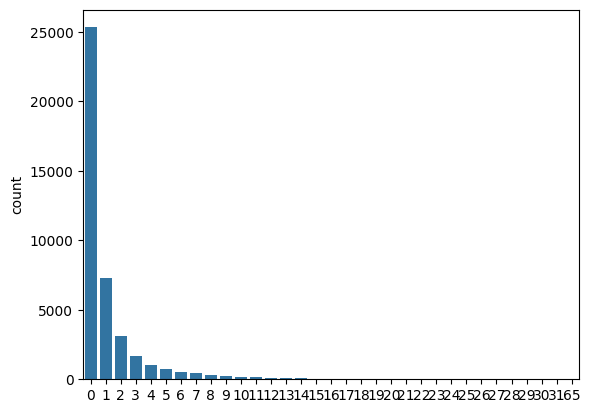

In [65]:
import seaborn as sns
labels = pd.cut(count_array, bins=range(0, int(max(count_array))+10, 10), labels=False)
sns.countplot(x=labels)

In [66]:
df.dropna(inplace=True)

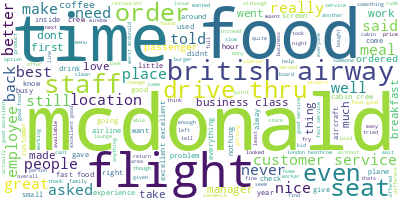

In [67]:
from wordcloud import WordCloud
long_string = ','.join(list(df['review']))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [68]:
import gensim as gs 

def get_corpus(df):
    corpus=[]
    for i in range(len(df)):
        corpus.append(df.iloc[i].split())
    return corpus
processed = get_corpus(df['review'])
dictionary = gs.corpora.Dictionary(processed)

In [69]:
count = 0
for k in dictionary.iteritems():
    print(k)
    count += 1
    if count > 10:
        break

(0, 'blame')
(1, 'delayed')
(2, 'delivering')
(3, 'demand')
(4, 'dont')
(5, 'enough')
(6, 'flight')
(7, 'fulfil')
(8, 'hire')
(9, 'inability')
(10, 'incapacity')


In [70]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [71]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [72]:
bow_doc_69 = bow_corpus[69]

for i in range(len(bow_doc_69)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_69[i][0], 
                                                     dictionary[bow_doc_69[i][0]], 
                                                     bow_doc_69[i][1]))

Word 4 ("dont") appears 1 time.
Word 6 ("flight") appears 4 time.
Word 13 ("although") appears 1 time.
Word 18 ("cabin") appears 1 time.
Word 22 ("could") appears 1 time.
Word 25 ("crew") appears 1 time.
Word 41 ("food") appears 1 time.
Word 52 ("nice") appears 1 time.
Word 54 ("offering") appears 1 time.
Word 59 ("really") appears 1 time.
Word 63 ("seat") appears 1 time.
Word 73 ("time") appears 2 time.
Word 75 ("without") appears 1 time.
Word 94 ("rest") appears 2 time.
Word 114 ("lounge") appears 1 time.
Word 126 ("service") appears 2 time.
Word 137 ("even") appears 2 time.
Word 139 ("extra") appears 1 time.
Word 147 ("long") appears 1 time.
Word 149 ("made") appears 1 time.
Word 168 ("anything") appears 1 time.
Word 194 ("customer") appears 1 time.
Word 199 ("downhill") appears 1 time.
Word 223 ("happened") appears 1 time.
Word 242 ("never") appears 1 time.
Word 266 ("said") appears 1 time.
Word 295 ("word") appears 1 time.
Word 296 ("work") appears 1 time.
Word 332 ("last") appear

In [73]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [74]:
corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf[69]

[(4, 0.07130910881144502),
 (6, 0.24657928907406246),
 (13, 0.10305669827213372),
 (18, 0.08041140577418165),
 (22, 0.07526013541484257),
 (25, 0.07596961931821444),
 (41, 0.03763072896587245),
 (52, 0.06904121535488913),
 (54, 0.12170696338038911),
 (59, 0.07249380609268932),
 (63, 0.06945965242534209),
 (73, 0.10052371764206636),
 (75, 0.0925418900026639),
 (94, 0.22843744001710486),
 (114, 0.09554744040890155),
 (126, 0.07820646386240572),
 (137, 0.13300131597601866),
 (139, 0.09484147478629561),
 (147, 0.07225449300541195),
 (149, 0.08186179923431844),
 (168, 0.09935929468678283),
 (194, 0.06365005705512936),
 (199, 0.15870083309296726),
 (223, 0.12008222167105),
 (242, 0.07240535120530993),
 (266, 0.0828881772029319),
 (295, 0.12780552959188207),
 (296, 0.07656528683252048),
 (332, 0.08956205112558657),
 (453, 0.09592597013550758),
 (476, 0.06740841693252358),
 (542, 0.09044946200306617),
 (566, 0.08361211763248697),
 (591, 0.0965946739359432),
 (606, 0.09218473082168158),
 (647, 

In [75]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(6, 5),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1)],
 [(6, 2),
  (11, 2),
  (23, 1),
  (63, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1)

In [76]:
lda_model = gs.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes = 20, workers=18)

In [77]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(topic, idx))
    print("\n")

Topic: 0.050*"mcdonalds" + 0.034*"place" + 0.022*"food" + 0.015*"area" + 0.015*"good" + 0.014*"kid" + 0.014*"location" + 0.014*"clean" + 0.012*"order" + 0.011*"nice" 
Words: 0


Topic: 0.022*"flight" + 0.021*"hour" + 0.012*"customer" + 0.011*"told" + 0.011*"time" + 0.011*"would" + 0.009*"call" + 0.008*"open" + 0.007*"could" + 0.007*"service" 
Words: 1


Topic: 0.037*"good" + 0.029*"service" + 0.026*"food" + 0.025*"manager" + 0.025*"customer" + 0.019*"rude" + 0.018*"order" + 0.017*"terrible" + 0.013*"even" + 0.012*"employee" 
Words: 2


Topic: 0.056*"order" + 0.027*"drive" + 0.026*"minute" + 0.021*"food" + 0.019*"thru" + 0.016*"line" + 0.016*"wait" + 0.014*"time" + 0.013*"long" + 0.012*"waited" 
Words: 3


Topic: 0.034*"flight" + 0.022*"seat" + 0.011*"crew" + 0.011*"service" + 0.011*"london" + 0.010*"cabin" + 0.010*"class" + 0.009*"food" + 0.009*"time" + 0.009*"british" 
Words: 4


Topic: 0.062*"excellent" + 0.029*"love" + 0.020*"tablet" + 0.017*"great" + 0.012*"easy" + 0.010*"This" + 0

In [78]:

lda_model_tfidf = gs.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 10, 
                                       workers=18)

In [79]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.024*"mcdonald" + 0.019*"worst" + 0.013*"mcdonalds" + 0.012*"ever" + 0.010*"okay" + 0.009*"attention" + 0.009*"service" + 0.008*"donalds" + 0.007*"food" + 0.006*"area"


Topic: 1 Word: 0.519*"excellent" + 0.200*"neutral" + 0.008*"disapointed" + 0.006*"service" + 0.003*"thanks" + 0.003*"beautiful" + 0.002*"food" + 0.002*"mcrib" + 0.002*"great" + 0.002*"claim"


Topic: 2 Word: 0.015*"dirty" + 0.013*"coffee" + 0.011*"like" + 0.009*"homeless" + 0.009*"place" + 0.009*"quick" + 0.008*"closed" + 0.008*"mcdonalds" + 0.007*"food" + 0.007*"drive"


Topic: 3 Word: 0.269*"good" + 0.046*"mcdonalds" + 0.038*"food" + 0.027*"service" + 0.020*"best" + 0.019*"always" + 0.017*"fresh" + 0.013*"awesome" + 0.009*"place" + 0.008*"typical"


Topic: 4 Word: 0.077*"great" + 0.023*"service" + 0.016*"food" + 0.014*"place" + 0.012*"delicious" + 0.011*"cream" + 0.010*"mcdonalds" + 0.008*"machine" + 0.008*"wonderful" + 0.008*"customer"


Topic: 5 Word: 0.032*"poor" + 0.019*"cold" + 0.015*"fry" + 0.01

In [80]:
document_num = 5

for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8543228507041931	 
Topic: 0.022*"flight" + 0.021*"hour" + 0.012*"customer" + 0.011*"told" + 0.011*"time" + 0.011*"would" + 0.009*"call" + 0.008*"open" + 0.007*"could" + 0.007*"service"

Score: 0.14252598583698273	 
Topic: 0.034*"flight" + 0.022*"seat" + 0.011*"crew" + 0.011*"service" + 0.011*"london" + 0.010*"cabin" + 0.010*"class" + 0.009*"food" + 0.009*"time" + 0.009*"british"


In [81]:
# import pickle

# with open('./amazondataset/dictionary.pkl', 'rb') as file:
#     dictionary = pickle.load(file)
# with open('./amazondataset/lda_model.pkl', 'rb') as file:
#     lda_model = pickle.load(file)
# with open('./amazondataset/lda_model_tfidf.pkl', 'rb') as file:
#     lda_model_tfidf = pickle.load(file)
# with open('./amazondataset/bow_corpus.pkl', 'rb') as file:
#     bow_corpus = pickle.load(file)
# with open('./amazondataset/corpus_tfidf.pkl', 'rb') as file:
#     corpus_tfidf = pickle.load(file)
# with open('./amazondataset/tfidf.pkl', 'rb') as file:
#     tfidf = pickle.load(file)


In [93]:
unseen_document = "Fresh, seasonal ingredients, creative dishes, and a commitment to sustainability that makes you feel good." 
def breaker(text):
    return text.split()
# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
print(bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
        print(lda_model.print_topic(index, 1))

Cleaned, tokenized and lemmatized: fresh seasonal ingredient creative dish commitment sustainability make feel good
[(141, 1), (235, 1), (745, 1), (1176, 1), (2158, 1), (2960, 1)]
0.033*"fry"
0.034*"flight"
0.114*"service"
0.050*"mcdonalds"
0.063*"staff"
0.048*"mcdonalds"
0.037*"good"
0.062*"excellent"
0.056*"order"
0.022*"flight"


In [94]:
unseen_document = "Fresh, seasonal ingredients, creative dishes, and a commitment to sustainability that makes you feel good."
def breaker(text):
    return text.split()
new_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
new_vector = tfidf[new_vector]

for index, score in sorted(lda_model_tfidf[new_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}    Topic: {}".format(score, lda_model.print_topic(index, 5)))

Cleaned, tokenized and lemmatized: fresh seasonal ingredient creative dish commitment sustainability make feel good
Score: 0.40802428126335144    Topic: 0.063*"staff" + 0.037*"clean" + 0.036*"friendly" + 0.028*"nice" + 0.023*"dirty"
Score: 0.34749284386634827    Topic: 0.056*"order" + 0.027*"drive" + 0.026*"minute" + 0.021*"food" + 0.019*"thru"
Score: 0.030563022941350937    Topic: 0.114*"service" + 0.097*"food" + 0.081*"good" + 0.074*"great" + 0.059*"fast"
Score: 0.030561817809939384    Topic: 0.033*"fry" + 0.026*"order" + 0.021*"ordered" + 0.019*"time" + 0.017*"meal"
Score: 0.030561160296201706    Topic: 0.050*"mcdonalds" + 0.034*"place" + 0.022*"food" + 0.015*"area" + 0.015*"good"
Score: 0.030560992658138275    Topic: 0.062*"excellent" + 0.029*"love" + 0.020*"tablet" + 0.017*"great" + 0.012*"easy"
Score: 0.03056066483259201    Topic: 0.037*"good" + 0.029*"service" + 0.026*"food" + 0.025*"manager" + 0.025*"customer"
Score: 0.03056064434349537    Topic: 0.048*"mcdonalds" + 0.025*"ever